# 1. Convertir de RGB a escala de Grises

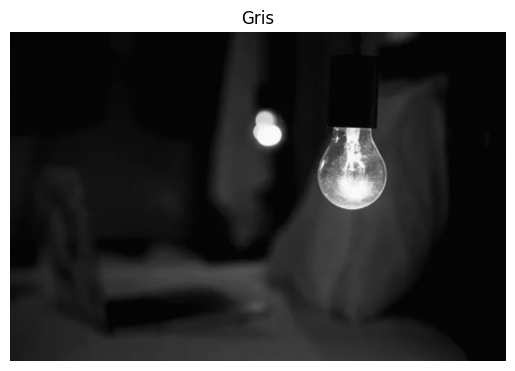

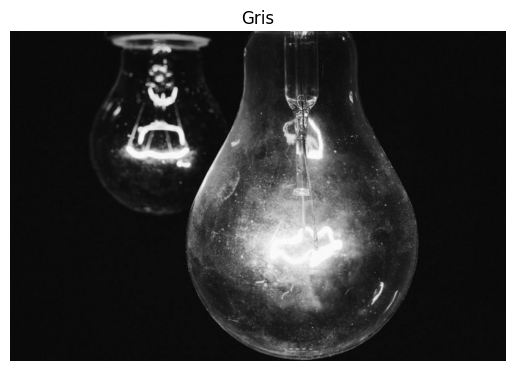

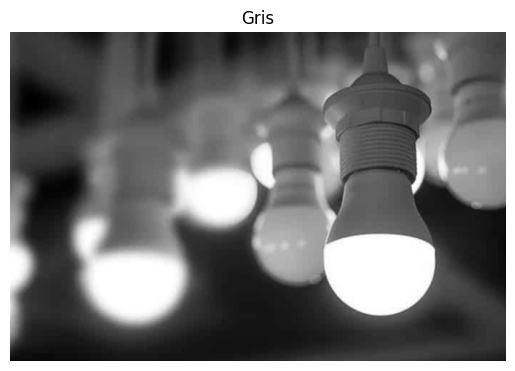

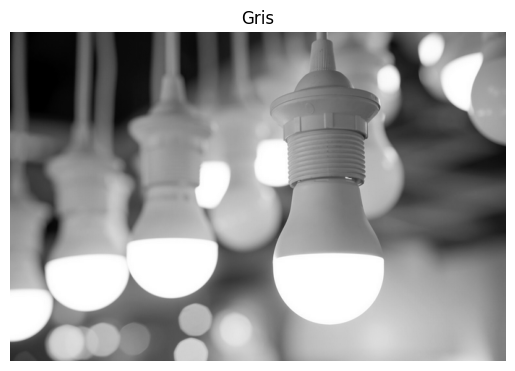

In [10]:
import cv2
import matplotlib.pyplot as plt

# Cargar las imagenes en color
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png ', '../image/4.png']

for i in range(len(imagenes)):
    img = cv2.imread(imagenes[i])  # Leer en BGR
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
    gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)  # Convertir a gris desde RGB

    # Mostrar la imagen en gris
    plt.imshow(gray_img, cmap='gray')
    plt.axis('off')
    plt.title('Gris')
    plt.show()
    # Guardar la imagen en escala de grises
    cv2.imwrite("../image/resultados/operaciones/gris/imagenes-gris" + str(i+1) + ".png", gray_img)



# 2. Convertir a Blanco y Negro (Binaria)

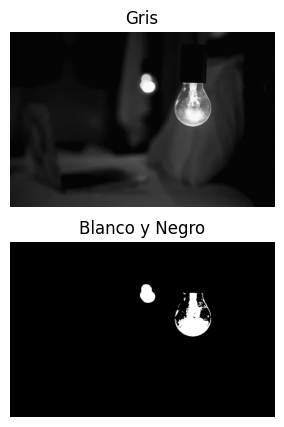

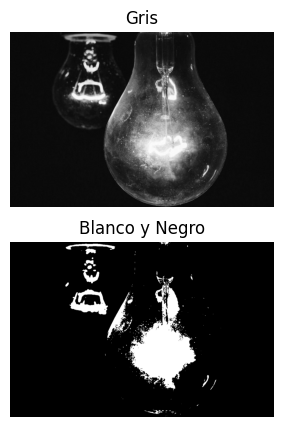

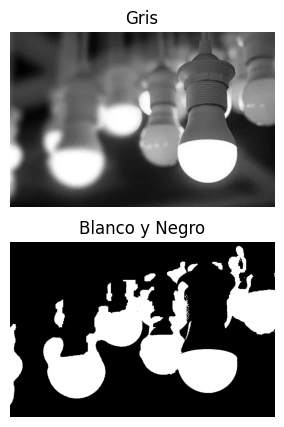

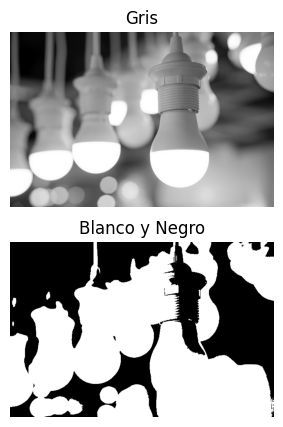

In [13]:
import cv2

# Cargar las imagenes en escala de grises (corregir rutas y espacios)
imagenes = [
    '../image/resultados/operaciones/gris/imagenes-gris1.png',
    '../image/resultados/operaciones/gris/imagenes-gris2.png',
    '../image/resultados/operaciones/gris/imagenes-gris3.png',
    '../image/resultados/operaciones/gris/imagenes-gris4.png'
]

for i in range(len(imagenes)):
    img = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises

    # Umbralizar la imagen para convertirla en blanco y negro (binaria)
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Mostrar las imágenes utilizando matplotlib
    fig, axes = plt.subplots(2, 1, figsize=(15, 5))

    # Imagen original en gris
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Gris")
    axes[0].axis('off')

    # Blanco y negro (binaria)
    axes[1].imshow(binary_img, cmap='gray')
    axes[1].set_title("Blanco y Negro")
    axes[1].axis('off')

    # Guardar la imagen en blanco y negro
    cv2.imwrite("../image/resultados/operaciones/binaria/imagenes-binaria" + str(i+1) + ".png", binary_img)


    plt.show()